# Backtest Analysis

### Setup

In [1]:
ticker = 'FSLY'
label = "SDS_standard"
from_date = "2015-01-01"
out_dir = r"./out_visualize"

In [2]:
import os
from datetime import datetime
import pandas as pd
import numpy as np
pd.options.display.float_format = '{:,.2f}'.format

import matplotlib as mpl
import matplotlib.pyplot as plt

import plotly.graph_objects as go
import plotly.express as px
from plotly.subplots import make_subplots

%matplotlib widget
# inline is the old interface

In [3]:
# import pandas_datareader as pdr
# import os
# from datetime import date 

# if not os.path.exists(os.path.join(r'../md/daily',f'{ticker}.csv')):
#     df = pdr.DataReader(ticker, 'yahoo', start='2012-01-01', end=date.today().isoformat())
#     df.to_csv(os.path.join(r'../md/daily',f'{ticker}.csv'))

### Run backtest

In [4]:
import backfire as bf

env = bf.Environment(md=r"../md/daily", out_dir=out_dir)
entry_signal = bf.Stage2Signal()
exit_signal = None
risk_management = bf.OpenProtectiveStop(stop_loss=0.07, take_profit_threshold=0.2, trailing_stop_period=20)
# position management - fixed_amount

s = bf.SignalDrivenStrategy(
    env=env,
    entry_signal=bf.Stage2Signal(),
    exit_signal=exit_signal,
    risk_management=risk_management,
    name=f"SDS_standard")
s.backtest(ticker=ticker, from_date=from_date)

print("Backtest done.")

Backtest done.


### Visualize signals and positions

In [5]:
df = pd.read_csv(os.path.join(out_dir, f"pos_{ticker}_{label}.csv"),index_col=0,parse_dates=True)
df['50dSMA'] = df.C.rolling(50, min_periods=20).mean()
df['200dSMA'] = df.C.rolling(200,min_periods=100).mean()

In [6]:
# from_to = ['2020-05-01', '2021-03-01']
# from_to = [datetime.strptime(x, "%Y-%m-%d").date() for x in from_to]
# df = df.loc[from_to[0]:from_to[1]]

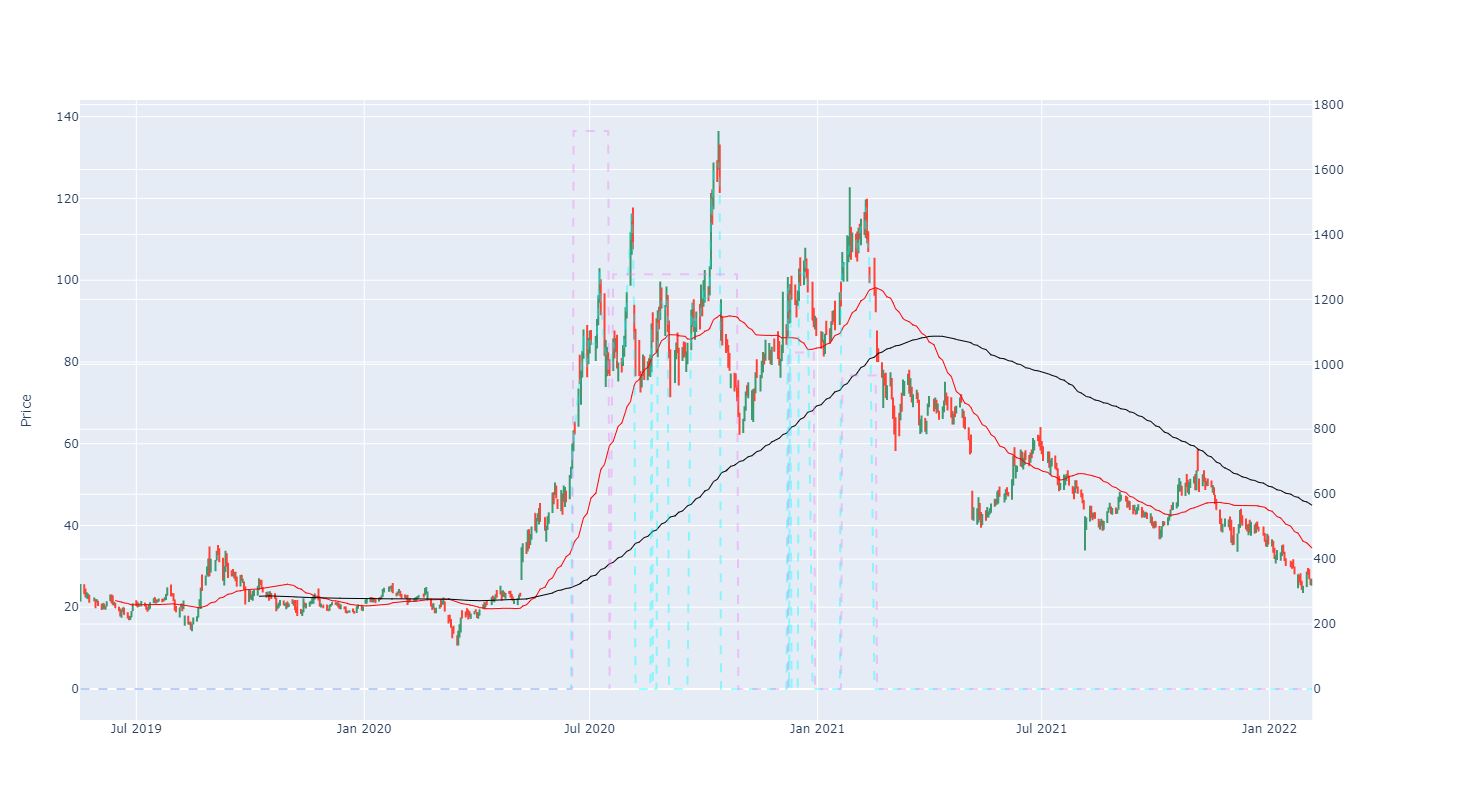

In [11]:
fig = make_subplots(specs=[[{"secondary_y":True}]])

fig.add_trace(go.Ohlc(
    name="price",
    x=df.index, open=df.O, high=df.H, low=df.L, close=df.C,
    xhoverformat='%Y-%m-%d'),secondary_y = False)
fig.add_trace(go.Scatter(name="ma50",x=df.index,y=df["50dSMA"],line={'color': 'red', 'width': 1}),secondary_y=False)
fig.add_trace(go.Scatter(name="ma200",x=df.index,y=df["200dSMA"],line={'color': 'black', 'width': 1}),secondary_y=False)

fig.add_trace(go.Scatter(name='pos',x = df.index,y = df.pos,line_color='violet',mode='lines',line={'dash':'dash'},marker_line_width=1,opacity=0.4),
              secondary_y = True)

fig.add_trace(go.Scatter(name=entry_signal.name,x=df.index,y=df.es,line_color='cyan',mode='lines',line={'dash':'dash'},marker_line_width=1,opacity=0.4),
              secondary_y = False)

fig.update_layout(autosize=False, 
                  width=1500,
                  height=800,
                  title="",
                  yaxis_title="Price",
                  xaxis_rangeslider_visible=False,
                  showlegend=False,
                 hovermode='x unified')
fig.show()

### Visualize Trades

In [12]:
trades = pd.read_csv(os.path.join(out_dir,f'trades_{ticker}_{label}.csv'),index_col=0,header=0)
trades.sort_values('entry_date', ascending=True, inplace=True)
trades

,ticker,entry_date,entry_price,shares,exit_date,exit_price,memo,pnl,pnl_pcnt,hp
0,FSLY,2020-06-18,58.19,"1,718.51",2020-07-17,79.21,bought-Stage2_rise200dlength=1_rise200dstep=0....,"36,123.05",0.36,29 days
1,FSLY,2020-07-20,78.27,"1,277.63",2020-10-29,74.54,bought-Stage2_rise200dlength=1_rise200dstep=0....,"-4,765.55",-0.05,101 days
2,FSLY,2020-12-09,96.49,"1,036.38",2020-12-30,90.25,bought-Stage2_rise200dlength=1_rise200dstep=0....,"-6,466.99",-0.06,21 days
3,FSLY,2021-01-21,103.54,965.81,2021-02-18,86.70,bought-Stage2_rise200dlength=1_rise200dstep=0....,"-16,264.25",-0.16,28 days


### Review Performance Statistics

In [9]:
trades = pd.read_csv(os.path.join(out_dir,f'stats_{ticker}_{label}.csv'),index_col=0,header=0)
trades

,stats
no_trades,4
no_winning_trades,1
no_losing_trades,3
win/loss ratio,0.25
avg_pnl_pcnt,0.02
avg_winning_pnl_pcnt,0.36
avg_losing_pnl_pcnt,-0.09
r,4.0
min_pnl_pcnt,-0.16
max_pnl_pcnt,0.36
